# Walk through a Notebook for computer vision


In [5]:
#import paskages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.10.0'

In [2]:
# Load data
fmnist = tf.keras.datasets.fashion_mnist

In [4]:
#split data
(training_images ,training_labels) , (test_images,test_labels)  = fmnist.load_data()

In [15]:

index=0 

np.set_printoptions(linewidth=320)

In [17]:
#Print labels and images

print(training_labels[index])
print(training_images[index])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

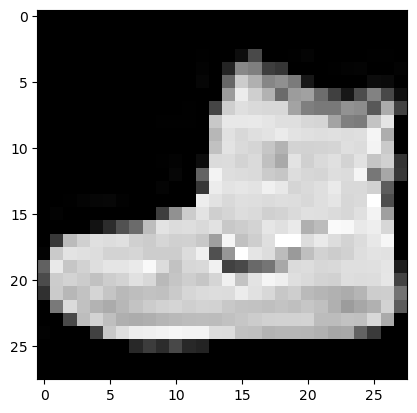

In [23]:
plt.imshow(training_images[index] , cmap="gray")

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 239 226 237 235 

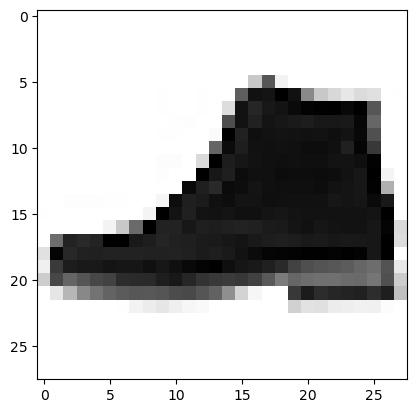

In [25]:

index=42
np.set_printoptions(linewidth=320)

#Print labels and images

print(training_labels[index])
print(training_images[index])

plt.imshow(training_images[index] , cmap="Greys")

In [26]:
#Normalize pixel values

training_images= training_images/255.0
test_images = test_images/255.0

In [27]:
# buiild classificaion model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128 , activation=tf.nn.softmax)
])

In [39]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

input to softmax function: [[1. 3. 4. 2.]]


In [40]:
# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]


In [41]:
# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

sum of outputs: 1.0


In [42]:

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

class with highest probability: 2


In [33]:

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5266 - accuracy: 0.8206
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3881 - accuracy: 0.8616
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3454 - accuracy: 0.8750
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3217 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3010 - accuracy: 0.8893


In [34]:
model.evaluate(test_images , test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8737


[0.356093168258667, 0.8737000226974487]